In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from geovoronoi import coords_to_points, points_to_coords, voronoi_regions_from_coords, calculate_polygon_areas,assign_points_to_voronoi_polygons
from geovoronoi.plotting import subplot_for_map, plot_voronoi_polys_with_points_in_area
pd.options.mode.chained_assignment = None


In [4]:
from uszipcode import ZipcodeSearchEngine
search = ZipcodeSearchEngine()
print(search.by_zipcode("35004")["Latitude"])

33.601524600000005


In [5]:
data = pd.read_csv("data/15zpallagi.csv")
data

,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,PREP,N2,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
0,1,AL,0,1,836320.0,481570.0,109790.0,233260.0,455560.0,1356760.0,...,373410.0,328469.0,0.0,0.0,0.0,0.0,61920.0,48150.0,732670.0,1933120.0
1,1,AL,0,2,494830.0,206630.0,146250.0,129390.0,275920.0,1010990.0,...,395880.0,965011.0,0.0,0.0,0.0,0.0,73720.0,107304.0,415410.0,1187403.0
2,1,AL,0,3,261250.0,80720.0,139280.0,36130.0,155100.0,583910.0,...,251490.0,1333418.0,0.0,0.0,0.0,0.0,64200.0,139598.0,193030.0,536699.0
3,1,AL,0,4,166690.0,28510.0,124650.0,10630.0,99950.0,423990.0,...,165320.0,1414283.0,0.0,0.0,0.0,0.0,45460.0,128823.0,116440.0,377177.0
4,1,AL,0,5,212660.0,19520.0,184320.0,4830.0,126860.0,589490.0,...,212000.0,3820152.0,420.0,168.0,60.0,31.0,83330.0,421004.0,121570.0,483682.0
5,1,AL,0,6,55360.0,2950.0,49260.0,350.0,41410.0,160530.0,...,55300.0,6027793.0,22090.0,39519.0,27550.0,95112.0,28590.0,791573.0,15960.0,250289.0
6,1,AL,35004,1,1490.0,970.0,230.0,280.0,700.0,2160.0,...,690.0,610.0,0.0,0.0,0.0,0.0,120.0,94.0,1290.0,2792.0
7,1,AL,35004,2,1350.0,630.0,360.0,300.0,610.0,2540.0,...,1140.0,3019.0,0.0,0.0,0.0,0.0,210.0,301.0,1130.0,2935.0
8,1,AL,35004,3,970.0,310.0,490.0,140.0,450.0,2160.0,...,930.0,5009.0,0.0,0.0,0.0,0.0,200.0,376.0,760.0,2058.0
9,1,AL,35004,4,620.0,110.0,470.0,30.0,300.0,1610.0,...,620.0,5190.0,0.0,0.0,0.0,0.0,150.0,374.0,460.0,1390.0


In [6]:
data["lat"] = 0.
data['lon'] = 0.
for row in data.index[::6]:
    if data['zipcode'][row]!= 0 and data['zipcode'][row]!= 99999:
        data['lat'][row:row+6] = search.by_zipcode("%05.f"%(data['zipcode'][row]))['Latitude']
        data['lon'][row:row+6] = search.by_zipcode("%05.f"%(data['zipcode'][row]))['Longitude']
data

,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,PREP,N2,...,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902,lat,lon
0,1,AL,0,1,836320.0,481570.0,109790.0,233260.0,455560.0,1356760.0,...,0.0,0.0,0.0,0.0,61920.0,48150.0,732670.0,1933120.0,0.000000,0.000000
1,1,AL,0,2,494830.0,206630.0,146250.0,129390.0,275920.0,1010990.0,...,0.0,0.0,0.0,0.0,73720.0,107304.0,415410.0,1187403.0,0.000000,0.000000
2,1,AL,0,3,261250.0,80720.0,139280.0,36130.0,155100.0,583910.0,...,0.0,0.0,0.0,0.0,64200.0,139598.0,193030.0,536699.0,0.000000,0.000000
3,1,AL,0,4,166690.0,28510.0,124650.0,10630.0,99950.0,423990.0,...,0.0,0.0,0.0,0.0,45460.0,128823.0,116440.0,377177.0,0.000000,0.000000
4,1,AL,0,5,212660.0,19520.0,184320.0,4830.0,126860.0,589490.0,...,420.0,168.0,60.0,31.0,83330.0,421004.0,121570.0,483682.0,0.000000,0.000000
5,1,AL,0,6,55360.0,2950.0,49260.0,350.0,41410.0,160530.0,...,22090.0,39519.0,27550.0,95112.0,28590.0,791573.0,15960.0,250289.0,0.000000,0.000000
6,1,AL,35004,1,1490.0,970.0,230.0,280.0,700.0,2160.0,...,0.0,0.0,0.0,0.0,120.0,94.0,1290.0,2792.0,33.601525,-86.489546
7,1,AL,35004,2,1350.0,630.0,360.0,300.0,610.0,2540.0,...,0.0,0.0,0.0,0.0,210.0,301.0,1130.0,2935.0,33.601525,-86.489546
8,1,AL,35004,3,970.0,310.0,490.0,140.0,450.0,2160.0,...,0.0,0.0,0.0,0.0,200.0,376.0,760.0,2058.0,33.601525,-86.489546
9,1,AL,35004,4,620.0,110.0,470.0,30.0,300.0,1610.0,...,0.0,0.0,0.0,0.0,150.0,374.0,460.0,1390.0,33.601525,-86.489546


In [7]:
data.to_csv("data/15zpallagi_zipadded.csv")

In [8]:
hospitals = pd.read_csv("data/Hospitals.csv")
print(set([i for i in hospitals]))
hospitals

{'NAME', 'STATE', 'ZIP', 'ZIP4', 'X', 'ADDRESS2', 'ADDRESS', 'TELEPHONE', 'SOURCE', 'VAL_DATE', 'ID', 'OBJECTID', 'COUNTY', 'LATITUDE', 'SOURCEDATE', 'HELIPAD', 'ST_FIPS', 'LONGITUDE', 'DATECREATE', 'OWNER', 'STATE_ID', 'COUNTYFIPS', 'VAL_METHOD', 'TYPE', 'NAICS_DESC', 'NAICS_CODE', 'ALT_NAME', 'TTL_STAFF', 'POPULATION', 'STATUS', 'Y', 'TRAUMA', 'WEBSITE', 'COUNTRY', 'BEDS', 'CITY'}


,X,Y,OBJECTID,ID,NAME,ADDRESS,ADDRESS2,CITY,STATE,ZIP,...,WEBSITE,STATE_ID,ALT_NAME,ST_FIPS,OWNER,TTL_STAFF,BEDS,TRAUMA,HELIPAD,DATECREATE
0,-71.474311,42.991565,7001,703102,CATHOLIC MEDICAL CENTER,100 MCGREGOR STREET,NOT AVAILABLE,MANCHESTER,NH,3102,...,http://www.catholicmedicalcenter.org,NOT AVAILABLE,NOT AVAILABLE,33,NON-PROFIT,-999,330,NOT AVAILABLE,Y,2013-05-30T00:00:00.000Z
1,-71.874536,42.971871,7002,1003047,CROTCHED MOUNTAIN REHABILITATION CENTER,1 VERNEY DRIVE,NOT AVAILABLE,GREENFIELD,NH,3047,...,http://www.cmf.org,NOT AVAILABLE,NOT AVAILABLE,33,NON-PROFIT,-999,62,NOT AVAILABLE,NOT AVAILABLE,2013-05-30T00:00:00.000Z
2,-71.940683,42.893089,7003,2003458,MONADNOCK COMMUNITY HOSPITAL,452 OLD STREET ROAD,NOT AVAILABLE,PETERBOROUGH,NH,3458,...,http://www.monadnockhospital.org,NOT AVAILABLE,NOT AVAILABLE,33,NON-PROFIT,-999,25,NOT AVAILABLE,Y,2013-05-30T00:00:00.000Z
3,-71.461375,42.756280,7004,2303060,SOUTHERN NEW HAMPSHIRE MEDICAL CENTER,8 PROSPECT STREET,NOT AVAILABLE,NASHUA,NH,3060,...,http://www.snhmc.org,NOT AVAILABLE,NOT AVAILABLE,33,NON-PROFIT,-999,188,II,Y,2013-05-30T00:00:00.000Z
4,-71.480212,42.749239,7005,2403061,ST JOSEPH HOSPITAL,172 KINSLEY ST,NOT AVAILABLE,NASHUA,NH,3061,...,http://www.stjosephhospital.com,NOT AVAILABLE,NOT AVAILABLE,33,NON-PROFIT,-999,208,II,NOT AVAILABLE,2013-05-30T00:00:00.000Z
5,-71.438000,42.983954,7006,3003103,ELLIOT HOSPITAL CITY OF MANCHESTER,ONE ELLIOT WAY,NOT AVAILABLE,MANCHESTER,NH,3103,...,http://www.elliothospital.org,NOT AVAILABLE,NOT AVAILABLE,33,NON-PROFIT,-999,296,II,Y,2013-05-30T00:00:00.000Z
6,-71.562020,43.197744,7007,103301,CONCORD HOSPITAL,250 PLEASANT STREET,NOT AVAILABLE,CONCORD,NH,3301,...,http://www.concordhospital.org,NOT AVAILABLE,NOT AVAILABLE,33,NON-PROFIT,-999,295,II,Y,2013-05-30T00:00:00.000Z
7,-71.644553,43.448404,7008,1203235,FRANKLIN REGIONAL HOSPITAL,15 AIKEN AVE,NOT AVAILABLE,FRANKLIN,NH,3235,...,http://www.lrgh.org,NOT AVAILABLE,NOT AVAILABLE,33,NON-PROFIT,-999,25,NOT AVAILABLE,Y,2013-05-30T00:00:00.000Z
8,-71.562835,43.199775,7009,1503301,HEALTHSOUTH REHABILITATION HOSPITAL,254 PLEASANT STREET,NOT AVAILABLE,CONCORD,NH,3301,...,http://www.healthsouthrehabconcordnh.com,NOT AVAILABLE,NOT AVAILABLE,33,PROPRIETARY,-999,50,NOT AVAILABLE,NOT AVAILABLE,2013-05-30T00:00:00.000Z
9,-72.000048,43.420638,7010,2103257,NEW LONDON HOSPITAL,273 COUNTY ROAD,NOT AVAILABLE,NEW LONDON,NH,3257,...,http://www.newlondonhospital.org,NOT AVAILABLE,NOT AVAILABLE,33,NON-PROFIT,-999,25,NOT AVAILABLE,Y,2013-05-30T00:00:00.000Z


zip_lat = [search.by_zipcode("%05.f"%(i))['Latitude']for i in data['zipcode'][0::6]if i!=0 if i != 99999]
zip_lon = [search.by_zipcode("%05.f"%(i))['Longitude']for i in data['zipcode'][0::6]if i!=0 if i != 99999]

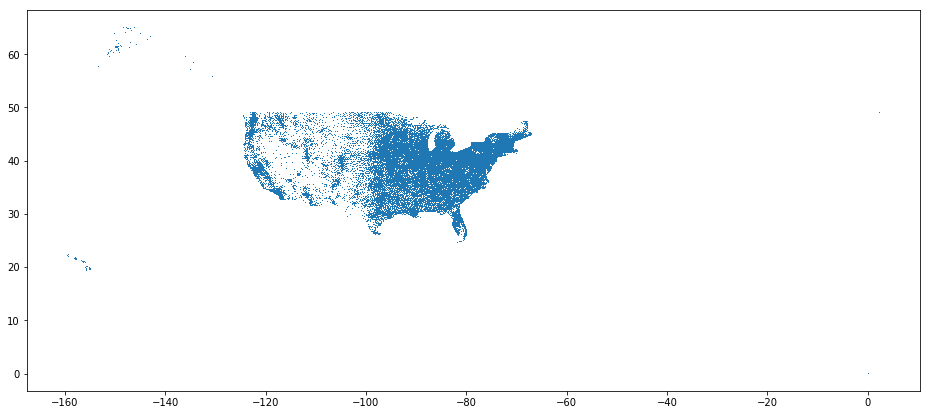

In [7]:
plt.figure(figsize=(16,7))
plt.plot([i for i in data['lon']],[i for i in data['lat']],',')
plt.show()

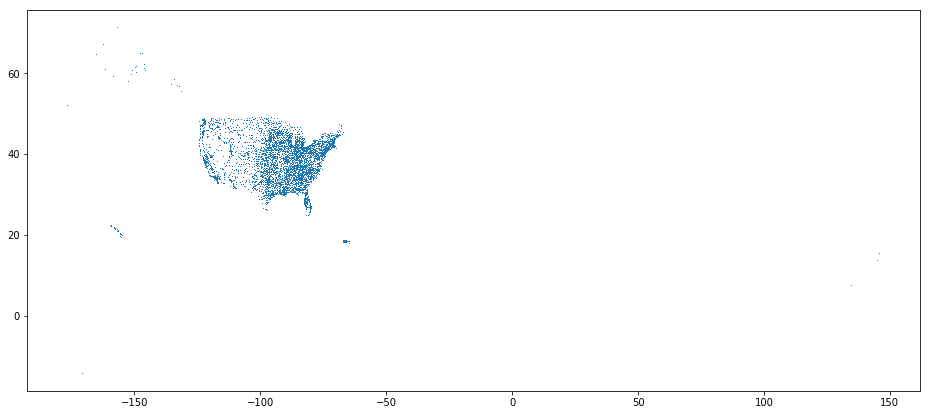

In [8]:
plt.figure(figsize=(16,7))
plt.plot([i for i in hospitals["X"]],[i for i in hospitals["Y"]],',')
plt.show()

7489
[[-1, 3], [11, 3, -1, 0, 4, 9], [11, 3, -1, 1, 10], [26, 12, 13, 6, 0, -1, 2, 5, 7, 14, 25], [41, 15, 14, 7, 8, 39], [54, 52, 51, 53], [52, 32, 17, 16, 51], [53, 10, 11, 9, 16, 51], [62, 60, 61], [62, 35, 19, 20, 60]]
7495
[[-71.4743109   42.99156518]
 [-71.87453591  42.9718711 ]
 [-71.94068275  42.89308942]
 [-71.4613747   42.75627984]
 [-71.48021205  42.74923911]
 [-71.438       42.983954  ]
 [-71.5620204   43.19774414]
 [-71.64455272  43.44840426]
 [-71.56283486  43.19977474]
 [-72.00004766  43.42063768]]


/home/michael/anaconda3/lib/python3.6/site-packages/scipy/spatial/_plotutils.py:20: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  was_held = ax.ishold()


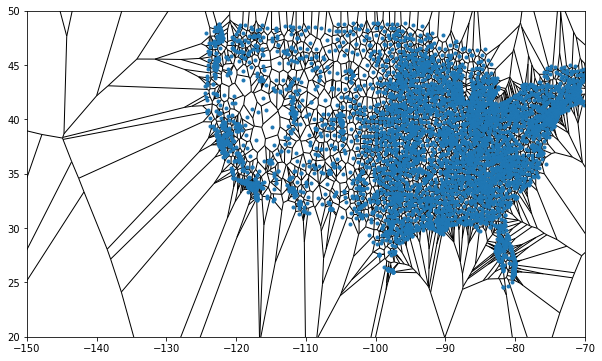

In [9]:
points = np.column_stack((hospitals["X"],hospitals["Y"]))



from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(points)
print(len(vor.regions)-1)
print(vor.regions[:10])

print(len(vor.points)-1)
print(vor.points[:10])
fig,ax=plt.subplots(figsize=(10,6))
voronoi_plot_2d(vor,ax=ax,show_vertices=False)
plt.ylim([20,50])
plt.xlim([-150,-70])
plt.show()


In [10]:
print(len(points))
points=np.unique(points,axis=0)

7496


In [11]:
print(vor.points)

[[-71.4743109   42.99156518]
 [-71.87453591  42.9718711 ]
 [-71.94068275  42.89308942]
 ..., 
 [-71.31666154  42.87677117]
 [-70.96016086  43.2975566 ]
 [-70.87410764  43.21322697]]


In [12]:
import logging
logging.basicConfig(level=logging.INFO)
geovoronoi_log = logging.getLogger('geovoronoi')
geovoronoi_log.setLevel(logging.INFO)
geovoronoi_log.propagate = True


In [13]:
COUNTRY = 'United States'

print('loading country `%s` from naturalearth_lowres' % COUNTRY)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

area = world[world.name == COUNTRY]
assert len(area) == 1

print('CRS:', area.crs)   # gives epsg:4326 -> WGS 84



loading country `United States` from naturalearth_lowres
CRS: {'init': 'epsg:4326'}


INFO:geovoronoi:running Voronoi tesselation for 7322 points
INFO:geovoronoi:generated 7322 Voronoi regions
INFO:geovoronoi:generating Voronoi polygon lines
INFO:geovoronoi:generating Voronoi polygon shapes
INFO:geovoronoi:assigning 7322 points to 7322 Voronoi polygons


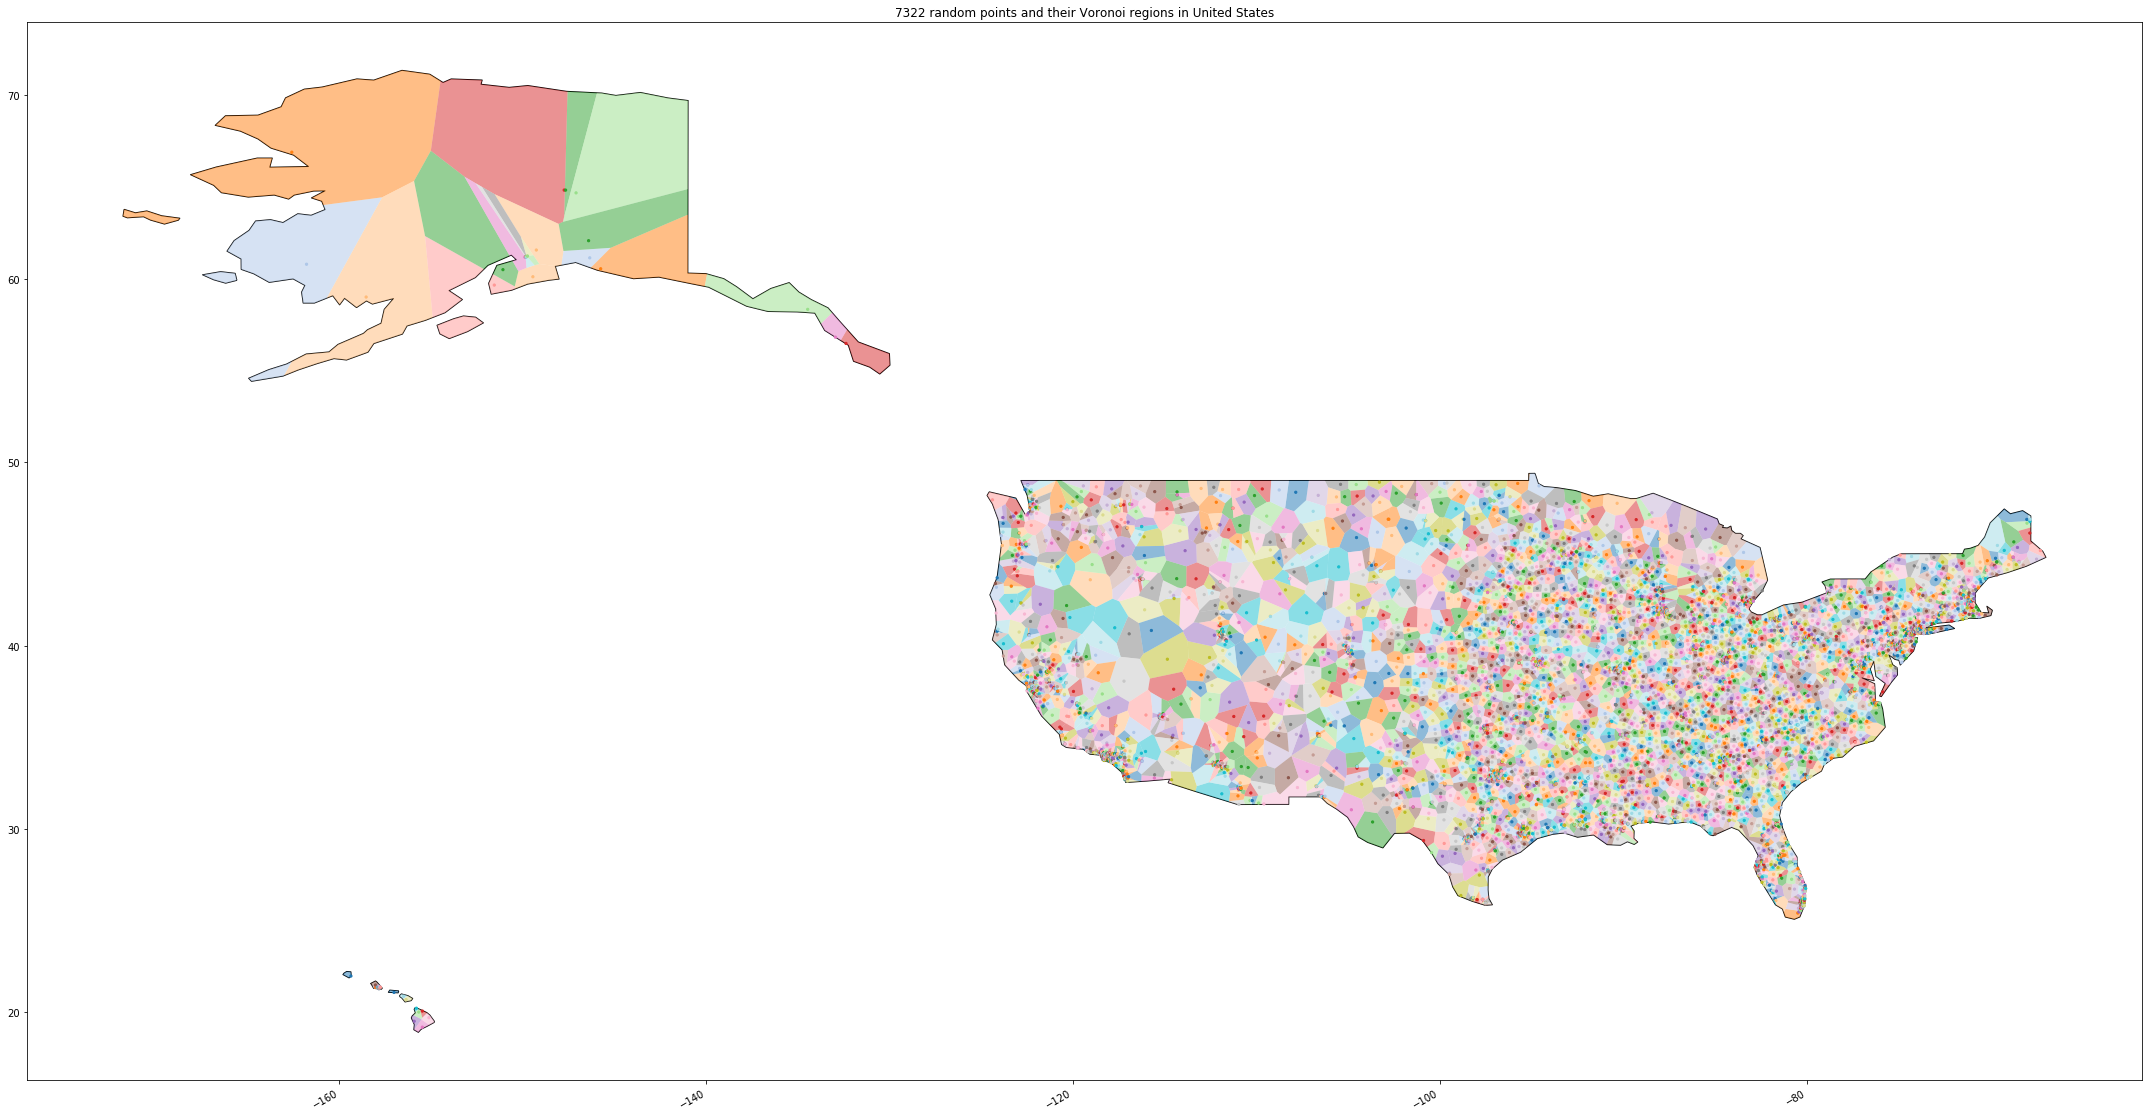

In [14]:
coords=points

area_shape = area.iloc[0].geometry   # get the Polygon
pts = [p for p in coords_to_points(coords) if p.within(area_shape)]
coords = points_to_coords(pts)
del pts


poly_shapes, pts, poly_to_pt_assignments = voronoi_regions_from_coords(coords, area_shape,return_unassigned_points=False)
poly_areas = calculate_polygon_areas(poly_shapes, m2_to_km2=True)

fig, ax = subplot_for_map(show_x_axis=True, show_y_axis=True,figsize=(30,40))


plot_voronoi_polys_with_points_in_area(ax, area_shape, poly_shapes, coords, poly_to_pt_assignments)

ax.set_title('%d random points and their Voronoi regions in %s' % (len(pts), COUNTRY))

plt.tight_layout()
plt.savefig('random_points_and_area.png')
plt.show()


In [24]:
import inspect
lines = inspect.getsource(calculate_polygon_areas)
print(lines)
poly_shapes[1].area
population = np.column_stack((data['lon'],data['lat']))

def calculate_polygon_areas(poly_shapes, m2_to_km2=False):
    """
    Return the area of the respective polygons in `poly_shapes`. Returns a NumPy array of areas in m² (if `m2_to_km2` is
    False) or km² (otherwise).
    """
    areas = np.array([p.area for p in poly_shapes])
    if m2_to_km2:
        return areas / 1000000    # = 1000²
    else:
        return areas



In [15]:
population = np.column_stack((data['lon'],data['lat']))

pop_assigned = assign_points_to_voronoi_polygons(coords_to_points(population),poly_shapes,accept_n_coord_duplicates = len(population)-len(poly_shapes))
    #facility_list=[p for p in coords_to_points() if p.within(poly_shapes[1])]

KeyboardInterrupt: 

In [25]:
import pyproj
from shapely.geometry import shape
from shapely.ops import transform
from functools import partial

def get_area(geom):
    s = shape(geom)
    proj = partial(pyproj.transform, pyproj.Proj(init='epsg:4326'),
                   pyproj.Proj(init='epsg:3857'))

    s_new = transform(proj, s)

    projected_area = transform(proj, s).area
    return projected_area/10000000


areas= [get_area(i) for i in poly_shapes]

In [26]:
poly_areas = calculate_polygon_areas(poly_shapes, m2_to_km2=False)
np.min(poly_areas)

1.0259462153749531e-06

In [95]:
print(len(points))
new_points = np.zeros((len(pts),2))

for i,j in enumerate(pts):
    new_points[i,0] =j.x
    new_points[i,1] = j.y
print(new_points)

7489
[[-162.58682625   66.89600162]
 [-161.78461277   60.78834235]
 [-159.36492446   21.98614785]
 ..., 
 [ -67.8243888    46.88653796]
 [ -67.47585524   44.71396912]
 [ -67.26801571   45.17758929]]


In [104]:
from scipy.spatial import cKDTree
def find_n_c2(lat_long,pop,facility):
    '''compute population in the voronoi cell of each facility and return an array'''
    
    n=0
    voronoi_kdtree = cKDTree(facility) #computes ckdtree
    
    # distance, and region
    test_point_dist, test_point_regions = voronoi_kdtree.query(lat_long, k=1) 
    
    
    # compute number of people in cell
    bin_pop = np.ones(len(facility),dtype = int)
    
    # population from each zip to each facility
    print(test_point_regions)
    
    for i in range(len(lat_long)):
        if test_point_regions[i]!= 7322:
            bin_pop[test_point_regions[i]]+= pop[i]
        
    # compute distance
    bin_distance = np.zeros(len(pop))
    
    # total distance
    for i in range(len(pop)):
        bin_distance[test_point_regions[i]]+= test_point_dist[i]*pop[i]
    
    n = np.sum(bin_pop)
    c = np.sum(bin_distance)
    return bin_pop ,bin_distance, test_point_regions,n,c
bin_pop,bin_distance,test_point_regions,n,c = find_n_c2(population,data["N1"].values,new_points)


166698
7322
[7320 7320 7320 ..., 7320 7320 7320]


/home/michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars


from scipy.spatial import cKDTree
def find_n_c(lat_long,pop,facility):
    print(len(pop))
    print(len(facility))
    c=0
    n=0
    voronoi_kdtree = cKDTree(facility) #computes ckdtree
    
    # distance, and region
    test_point_dist, test_point_regions = voronoi_kdtree.query(lat_long, k=1) 
    
    
    # compute number of people in cell
    bin_pop = np.zeros(len(lat_long),dtype = int)
    
    # population from each zip to each facility

    for i in range(len(lat_long)):
        bin_pop[test_point_regions[i]]+= pop[i]
        
    # compute distance
    bin_distance = np.zeros(len(pop))
    
    # total distance
    for i in range(len(pop)):
        bin_distance[test_point_regions[i]]+= test_point_dist[i]*pop[i]
    
    n = np.sum(bin_pop)
    c = np.sum(bin_distance)
    return bin_pop ,bin_distance, test_point_regions,n,c
bin_pop,bin_distance,test_point_regions,n,c = find_n_c(population[::6],data["N1"][::6].values,points)

print(n)
print(points)
print(population[::6])
print(data["N1"][::6].values)
print(test_point_regions)
print(poly_areas)

In [113]:
newbin=bin_pop[bin_pop !=1]
areas = np.array(areas)
newareas = areas[bin_pop !=1]

In [138]:
newbin

array([    25161,     56131,     31331, ...,       831, 149445371,
           13961])

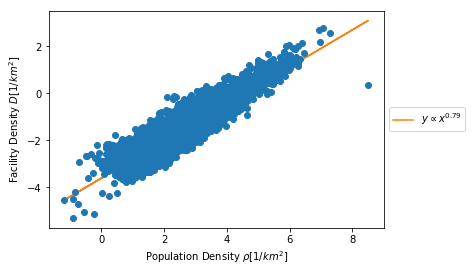

In [156]:
logx = np.log10(newbin/newareas)
logy = np.log10(1/newareas)


from scipy.optimize import curve_fit

def power_func(x,*a):
    '''power function.'''
    return a[0]+x*a[1]



a2,a2_cov = curve_fit(power_func,logx,logy,p0=(11.1,1))


plt.plot( logx,logy,'o')
plt.plot(logx,power_func(logx,*a2),label = r'$y \propto x^{%.2f}$'%(a2[1]),zorder=0)

plt.xlabel(r'Population Density $\rho [1/km^2]$')
plt.ylabel(r'Facility Density $D [1/km^2]$')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()



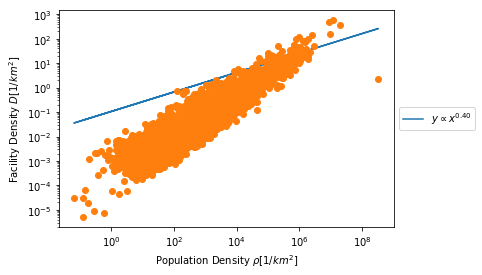

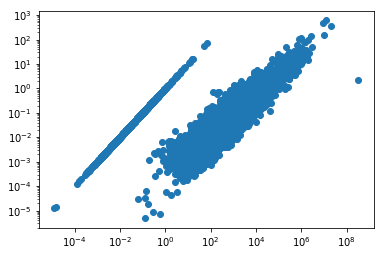

In [154]:
from scipy.optimize import curve_fit

def power_func(x,*a):
    '''power function.'''
    return a[0]*x**a[1]



a2,a2_cov = curve_fit(power_func,newbin/newareas,1/newareas,p0=(1,1))
plt.loglog(newbin/newareas,power_func(newbin/newareas,*a2),label = r'$y \propto x^{%.2f}$'%(a2[1]),zorder=0)


plt.loglog( newbin/newareas,1/newareas,'o')
plt.xlabel(r'Population Density $\rho [1/km^2]$')
plt.ylabel(r'Facility Density $D [1/km^2]$')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.loglog( bin_pop/areas,1/areas,'o')
plt.show()

In [44]:
print(len(test_point_regions))

27783


In [52]:
np.max(points)

145.724324

In [58]:
test_point_regions

array([7485, 4438, 4395, ..., 1186, 1157, 7485])

In [61]:
points[4438]

array([-86.66761102,  33.59615452])

/home/michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


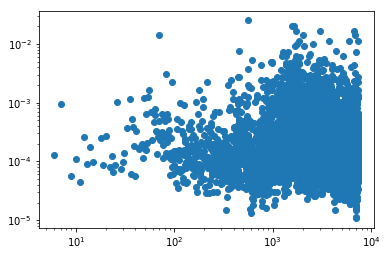

In [83]:
plt.loglog(1/bin_pop[:7485],'o')

plt.show()

In [146]:
print(newbin[x for i,x in enumerate(newbin) if i == 149445371])

SyntaxError: invalid syntax (<ipython-input-146-32bb5954e7ec>, line 1)

In [151]:
[x for x,i in enumerate(newbin) if i == 149445371]

[6427]

In [152]:
print(newbin)

[    25161     56131     31331 ...,       831 149445371     13961]
